# Исследование объявлений о продаже квартир


### Изучение общей информации. 

In [305]:
import pandas as pd

In [306]:
try:    
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except: 
    data = pd.read_csv('C:\\Users\\HP\\Desktop\\practicum\\DA\\исследовательский анализ\\real_estate_data.csv', sep='\t')

In [307]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

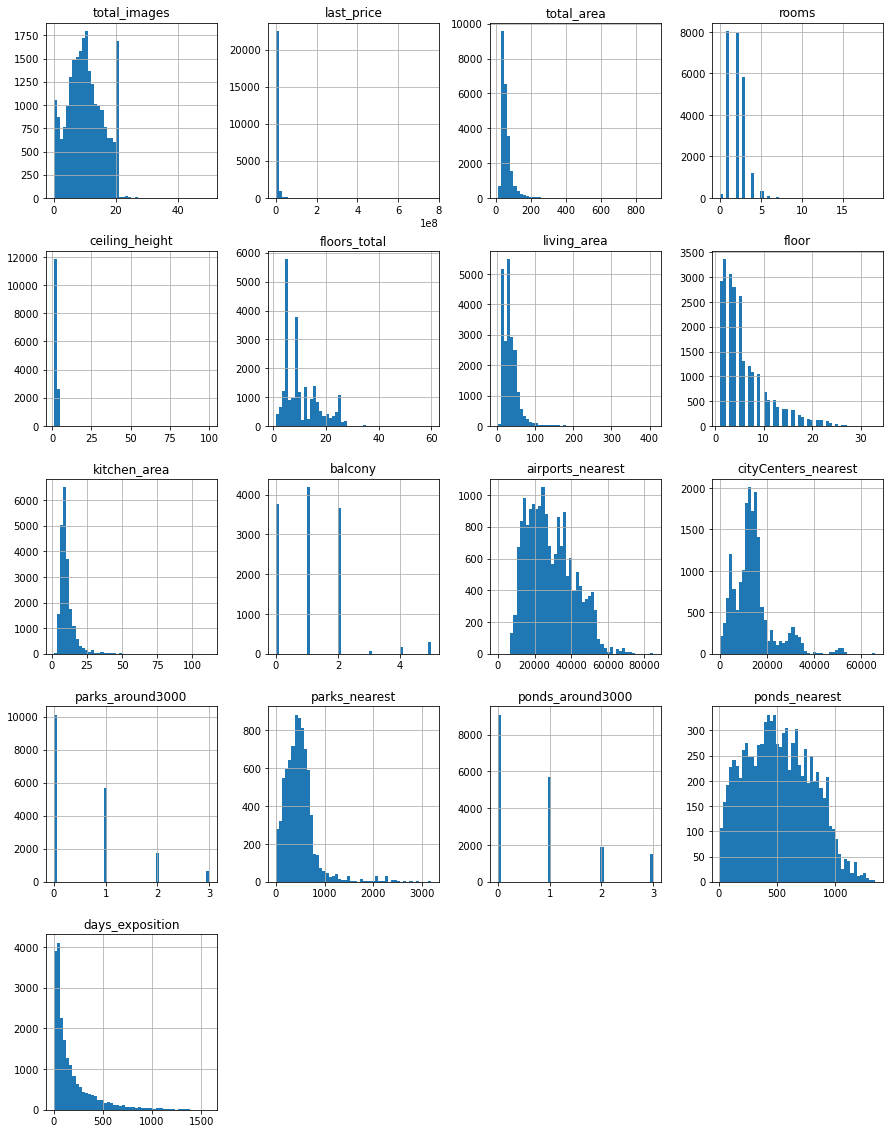

In [309]:
data.hist(figsize=(15, 20), bins=50);

По гистограммам видно:
1. чаще всего количество изображений объекта на сайте около 5-10, не малое количество объектов с количеством изображений 10-15, меньше всего объектов с количеством изображений более 20 штук;
2. Разбег по стоимостям квартир очень большой, оценить в данном варианте гистограмму сложно;
3. Пик по площадям квартир выпадает на 1/3 от 200, что составлять около 67 кв.м, однако необходимо рассмотрение гистограммы в большем масштабе;
4. Большее количество предложений на сервисе представлено однокомнатным и двухкомнатным квартирам, относительно них менее распространены трехкомнатные. Также на графике видно что среди предложений прустствуют объекты с количеством комнат более 3х.
5. Высота потолков на гистограмме данного масштаба у 0, что очевидно исходя из здравого смысла и нормальной высоты потолков около 2,5-3 м.
6. По общему количеству этажей в здании два пика - 5 и 9 этажей, далее с наименьшей распространенность указаны еще два пика - 12 и 16 этажей.
7. График для жилой площади также имеет два пика - чуть меньше и чуть больше 20 кв м.
8. Наиболее распространенными этажами являются этажи до 5го и до 10го, что соответствует графику с наиболее распространенной этажностью объектов
9. Гистограмма площади кухни сопостовами с гистограммами общей площади и жилой, при данном масштабе наиболее распространенными являются кухни 7-8 кв.м
10. Наиболее распространенными являются объекты с количеством балконов до 2
11. Наиболее распространенными являются объекты с удаленностью от аэропорта до 30 км, после чего на гистограмме видно снижение количества с увеличением удаленности
12. Большинство объектов расположено до 20 км от центра, при этом самыми распространенным расположениям является расстояние 10-20 км от центра
13. Зависимость в количества парков в радиусе 3 км от объекта логична, чем больше парков, тем меньше объектов
14. В случае наличия парков рядом, большинство расположено на расстоянии около 500 м, при этом при расстоянии до парка более 900 м количество объявлений незначительно
15. Ситуация с наличием водоемов рядом с квартирой аналогична ситуации с парками
16. График с расстоянием до ближайшего водоема говорит о том, что большая часть объявлений имет водоем на расстоянии до 1 км с пиком по середине для 500 м.
17. На гистограмме по количеству дней, которое бъявление провисело на сайте видно, что большая часть объявлений снимается не позднее 500 дней с момента размещения, однако продолжительность может доходить до 140 дней

### Предобработка данных

In [310]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [311]:
data.duplicated().sum() # Проверим наличие явных дубликатов в таблице

0

#### Удаление пропусков

Рассмотрим количество пропущенных значений в таблице

In [312]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

пропуски в количестве этажей в доме, высоте потолков, жилой площади, площади кухни, числе балконов мог не указать продавец недвижимости.
Причина пропусков о количестве дней публикации могла состоять в технических сбоях при формировании информации о снятии объявления.
к пропускам по причине технических ошибок при выгрузке c картографических данных относятся пропуски с расстоянием до аэропорта, центра, а также парка/водоема и их наличие в радиусе 3 км.

если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски заменим на 0


In [313]:
data['balcony'] = data['balcony'].fillna(0)

предположим, что ситуация с пропусками в столбце 'is_apartment' аналогична ситуации с количеством балконов: продавец не указал данную информацию по причине того, что тип продаваемого жилья не относится к апартаментам, заменим пропуски в данном столбце значениями False

In [314]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Посмотрим, какая информация есть по объектам без указания их месторасположения

In [315]:
data[data['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


In [316]:
data['locality_name'].value_counts().head()

Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

In [317]:
data.loc[data['locality_name'] == 'Санкт-Петербург', 'city_centers_nearest'].max()

29493.0

количество пропусков в столбце с местом расположения объекта недвижимости незначительно - 49 против 23699 строк в таблице (чуть более 0,2 %. Объявления в Санкт-Петербурге занимают более 66 % от общего количества. При этом объекты с пропусками в их расположении могут находится как на расстоянии 4 км, так и на расстоянии более 17 км от центра.
С учетом того, что для объявлений в Санкт-Петербурге расстояние до центра может быть более 29 км, предположим, что пропуски в столбце с локацией можно заменить на Санкт-Петербург ввиду незначительной доли пропусков и отсутствия "критики" по расстояниям для них (попадают в диапазон)

In [318]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')

Проверим как быстро снимались объявления

In [319]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [320]:
data['days_exposition'].sort_values().head(20)

1632     1.0
16053    2.0
13061    2.0
16212    2.0
18680    3.0
6909     3.0
20448    3.0
9717     3.0
11070    3.0
2944     3.0
9186     3.0
6888     3.0
20415    3.0
22887    3.0
19574    3.0
3858     3.0
1947     3.0
11793    3.0
18654    3.0
14979    3.0
Name: days_exposition, dtype: float64

со временем размещения в 1 день есть только одно объявления, значит объявления не снимаются быстро, заполнить пропуски значением 0 некорректно. Помимо 1 дня данные таблицы указывают на возможность быстрой продажи и за 2 дня, и за 3 дня. Количество пропусков значительно больше по отношению к наиболее встречающимся срокам снятия (3181 пропуск против 880 объявлений со сроком 45 дней), заполнение такого количества приведет к искажению, оставим пропуски незаполненными. 

для пропусков в столбце "общее количество этажей в доме" невозможно найти логическую замену. более того, заполнение данных пропусков исказит информацию по непосредственно этажу, на котором расположен объект, с точки зрения является ли он последним, поэтому оставим их пустыми.

для пропусков в столбце "общее количество этажей в доме" невозможно найти логическую замену. более того, заполнение данных пропусков исказит информацию по непосредственно этажу, на котором расположен объект, с точки зрения является ли он последним, поэтому оставим их пустыми.

In [321]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

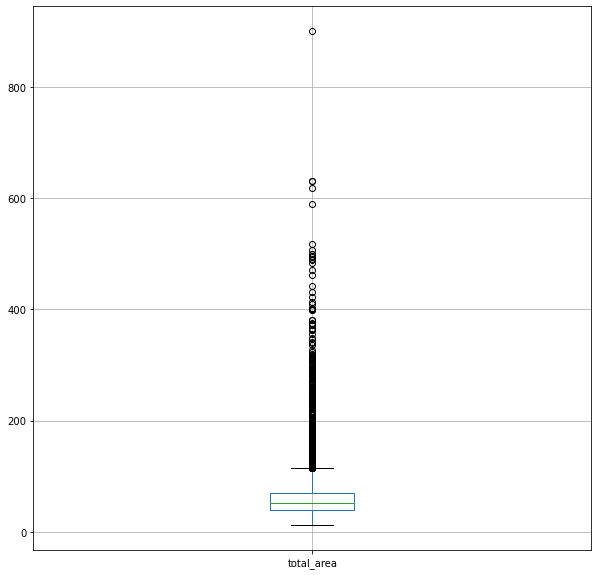

In [322]:
data.boxplot(column='total_area', grid=True, figsize=(10,10))

In [323]:
data.loc[:, ['total_area', 'living_area', 'kitchen_area']].corr()

,total_area,living_area,kitchen_area
total_area,1.000000,0.939537,0.609121
living_area,0.939537,1.000000,0.428674
kitchen_area,0.609121,0.428674,1.000000


предлагаем из за большого разбега значений от Q3 до max для общей площади заполнить пропуски в жилой площади и площади кухни медианой с разбегом в 100 кв.м по общей площади<b>

Проверим как много пропусков одновременно и по жилой площади, и по площади кухни

In [324]:
data.loc[(data['kitchen_area'].isna()) & (data['living_area'].isna()), 'first_day_exposition'].count()

1464

Категоризируем объекты по общей площади для возможности нахождения медианных значений жилой площади и кухни для каждой группы и заполним пропуски в kitchen_area и living_area

In [325]:
def type_total_area(row):
    total = row['total_area']
    if total < 40:
        return 'маленькая'
    if 40 <= total <= 70:
        return  'нормальная'
    if 71 <= total <= 170:
        return  'большая'
    if 171 <= total <= 270:
        return  'аномально большая1'
    if 271 <= total <= 370:
        return  'аномально большая2'
    return 'аномально большая3'


In [326]:
data['type_total_area'] = data.apply(type_total_area, axis=1)# Данный столбец потом можно удалить

In [327]:
for t in data['type_total_area'].unique():
    living_median = data.loc[data['type_total_area'] == t, 'living_area'].median()
    kitchen_median = data.loc[data['type_total_area'] == t, 'kitchen_area'].median()
    data.loc[(data['type_total_area'] == t) 
             & (data['living_area'].isna()) 
             & (data['total_area'] > (living_median + kitchen_median)), 'living_area'] = living_median
    data.loc[(data['type_total_area'] == t) 
             & (data['kitchen_area'].isna()) 
             & (data['total_area'] > (living_median + kitchen_median)), 'kitchen_area'] = kitchen_median

In [328]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                44
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              187
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
type_total_area             0
dtype: int64

In [329]:
data.loc[data['living_area'].isna(), ['total_area', 'living_area', 'kitchen_area']].head(10)

,total_area,living_area,kitchen_area
322,25.00,NaN,NaN
546,25.00,NaN,NaN
608,25.00,NaN,NaN
1608,20.10,NaN,NaN
3557,25.00,NaN,NaN
3817,23.98,NaN,NaN
3874,21.40,NaN,NaN
4418,25.00,NaN,NaN
4901,24.00,NaN,NaN
5239,24.40,NaN,NaN


In [330]:
data.loc[data['kitchen_area'].isna(), ['total_area', 'living_area', 'kitchen_area']].head(10)

,total_area,living_area,kitchen_area
322,25.0,NaN,NaN
349,25.0,17.0,NaN
546,25.0,NaN,NaN
608,25.0,NaN,NaN
697,24.1,17.5,NaN
716,17.0,12.0,NaN
946,23.0,18.0,NaN
1194,22.7,13.5,NaN
1280,23.0,17.0,NaN
1574,22.0,15.0,NaN


В таблице осталось незначительное количество пропусков для объектов, для которых сумма медианных значений жилой площади и кухни превышает общую, оставим их без изменений

Проверим минимальные и максимальные значения для столбца с высотой потолков

In [331]:
data['ceiling_height'].min()

1.0

In [332]:
data['ceiling_height'].max()

100.0

Необходима дополнительная обработка значений в столбце с высотой потолков

Рассмотрим пропуски в информации, полученной автоматически (по расстояниям).\
Предположим, что, если для пропусков в столбце с наличием и количеством парков рядом с объектом также присутствуют пропуски, то при получении информации с карт парков просто рядом не оказалось, ввиду чего не были заполнены значения (грубое допущение, так как ориентируемся на отсутствующие значения).
Проверим, указано ли расстояние до парка для пропущенных значений в количестве парков рядом с объектом.

In [333]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [334]:
miss_park = data.loc[~data['parks_around3000'].isin([0, 1, 2, 3]), 'parks_nearest'].unique()

На основе того, что для пропущенных значений не указано расстояние, заполним пропуски в количестве парков в радиусе 3 км значением 0

In [335]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Проверим аналогично для водоемов в радиусе 3 км и в случае отсутствия информации по расстоянию заменим на 0

In [336]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [337]:
data.loc[~data['ponds_around3000'].isin([0, 1, 2, 3]), 'ponds_nearest'].unique()

array([nan])

для всех пропусков в наличии парков также пропуски в расстояниях

In [338]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

посмотрим на расстояния для объектов, где отсутсвуют парки в радиусе 3 км

In [339]:
data.loc[data['parks_around3000'] == 0, 'parks_nearest'].unique()

array([  nan, 3064., 3190., 3013.])

заполним для них пропуски медианным значением

In [340]:
for dist in data['parks_around3000'].unique():
    data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['parks_around3000'] == 0), 'parks_nearest'].median()

Аналогично проверим информацию для водоемов

In [341]:
data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'].unique()

array([nan])

для всех объектов, для которых нет водемов
в радиусе 3 км, отсутствуют расстояния, заполним их на 'more than 3 km', так как понимаем, что этот столбец не понадобится для исследования.

In [342]:
data['ponds_nearest'] = data['ponds_nearest'].fillna('more than 3 km')

In [343]:
data.loc[data['city_centers_nearest'].isna(), 'locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Расстояние до центра не заполнено для объектов, расположенных в Ленинградской области, ввиду чего, считаем не совсем корректным заполнять их медианой по существующей информации ввиду того, что заполнение может исказить данные и не будет соответствовать действительности

In [344]:
data.loc[data['airports_nearest'].isna(), 'locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Ситуация с расстоянием до аэропорта аналогична пропускам в расстоянии до центра, объекты расположены в пригороде, расстояние до аэропорта будет выше. Можно предположить, что для данных объектов данные показатели с карт просто не выгружались

#### Изменение типа данных

необходимо изменить тип данных в столбцах first_day_exposition (из str в datatime для возможности работы с данным столбцом) и is_apartment (необходимо привести к типу bool на этaпе заполнения пропусков). Также можно поменять тип на int в столбце с количеством балконов, общим количеством этажей в доме, количеством
дней до снятия объявления (в случае отсутствия пропусков), а также наличии водоемов/парков поблизости.

In [345]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [346]:
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [347]:
data['last_price'] = data['last_price'].astype(int)

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23655 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23512 non-null  float64       
 13  balcony         

#### Удаление дубликатов

рассмотрим таблицу на наличие дубликатов

In [349]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В таблице обнаружены неявные дубликаты с использованием буквы ё, а также дубликаты с различным наименованием типа поселков (например, городской поселок и поселок городкого типа). Кроме того, обнаружены дубликаты самих субъектов, такие как:
- 'деревня Гарболово' и 'поселок Гарболово' (согласно википедии один и тот же субъект);
- 'поселок Мурино', 'Мурино';
- 'Кудрово' и 'деревня Кудрово'.\
Обработаем и исключим данные дубликаты.

In [350]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [351]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции')

In [352]:
data.loc[data['locality_name'] == 'деревня Гарболово', 'locality_name'] = 'поселок Гарболово'
data.loc[data['locality_name'] == 'поселок Мурино', 'locality_name'] = 'Мурино'
data.loc[data['locality_name'] == 'деревня Кудрово', 'locality_name'] = 'Кудрово'
data.loc[data['locality_name'] == 'поселок станции Громово', 'locality_name'] = 'поселок Громово'

In [353]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

#### Исключение аномальных значений

вернемся к высоте потолков, выведем уникальные значения

In [354]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В перечне указаны аномально низкие значения, высота потолка не может быть менее 2,4 м.

В перечне также указаны достаточно большие значения, начиная с 24х м. Можно предположить, что с 24х м - аномальные значения, которые должны быть на порядок ниже. 
посмотрим как соотносятся цены для для объектов с разной высотой потолков, например 2.4 и 24 м

In [355]:
data.loc[(data['ceiling_height'] == 24.0), 'last_price'].max()

3850000

In [356]:
data.loc[(data['ceiling_height'] == 2.4), 'last_price'].max()

8500000

In [357]:
data.loc[(data['ceiling_height'] == 25.0), 'last_price'].max()

4300000

In [358]:
data.loc[(data['ceiling_height'] == 2.5), 'last_price'].max()

88000000

Очевидно, что значения с высотой потолков на порядок выше минимальных стандартных являются выбросами.

заменим значения от 24.0 м на значения на порядок ниже, ориентируясь на то, что высота потолка должна быть не менее 2,4 м.

In [359]:
for height in data['ceiling_height'].unique():
    if height >= 24.0:
        new_height = height / 10
        data.loc[(data['ceiling_height'] == height), 'ceiling_height'] = new_height

Посмотрим как часто в таблице встречаются объекты с высотой потолков аномально минимальной и аномально максимальной

In [360]:
data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'].count()

21

In [361]:
data.loc[(data['ceiling_height'] >= 8.3) & (data['ceiling_height'] <= 22.6), 'ceiling_height'].count()

6

Их количество незначительно, исключим их из датафрейма

In [362]:
data = data.loc[~data['ceiling_height'].isin([1, 1.2, 1.75, 2, 2.2, 2.25, 2.3, 2.34, 8.3, 10, 10.3, 14, 20, 22.6])]

In [363]:
data['ceiling_height'].sort_values().unique()

array([2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55,
       3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68,
       3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15,
       4.19, 4.2 , 4.25, 4.3 , 4.37, 4.4 , 4.45, 4.

Ранее мы выяснили, что в данном столбце присутствуют пропуски, заполним их медианным значением

In [364]:
for height in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'].isna()), 'ceiling_height'] = \
    data['ceiling_height'].median()

Также по причине того, что информацию по общему количеству этажей в здании не представляется возможным заполнить, исключим данные строки из таблицы.

In [365]:
data = data.dropna(subset=['floors_total'])

In [366]:
data['floors_total'] = data['floors_total'].astype(int)

In [367]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area               40
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             182
balcony                    0
locality_name              0
airports_nearest        5517
city_centers_nearest    5494
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3168
type_total_area            0
dtype: int64

проверим другие столбцы на аномальные значения

In [368]:
data['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

In [369]:
data.loc[(data['kitchen_area'] <= 2)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_total_area
906,15,2600000,27.00,2017-07-10,1,2.75,23,18.0,18,False,...,0,Санкт-Петербург,22131.0,17459.0,0,3127.0,1,411.0,10.0,маленькая
6262,9,3100000,24.00,2018-06-25,2,3.00,5,16.0,5,False,...,0,Санкт-Петербург,31960.0,4914.0,2,426.0,1,936.0,54.0,маленькая
9138,17,2920000,23.29,2018-12-12,1,2.65,3,21.0,1,False,...,0,Санкт-Петербург,19506.0,4008.0,0,3127.0,2,45.0,107.0,маленькая
11033,6,5350000,32.00,2016-04-20,1,2.65,14,16.0,10,False,...,0,Санкт-Петербург,19008.0,3953.0,0,3127.0,1,69.0,210.0,маленькая
16367,2,2720000,25.70,2017-10-30,1,2.65,19,22.6,11,False,...,0,Санкт-Петербург,14472.0,13268.0,0,3127.0,0,more than 3 km,109.0,маленькая
19642,5,1190000,14.00,2018-07-29,1,2.65,5,11.0,1,False,...,0,Санкт-Петербург,9898.0,11122.0,0,3127.0,0,more than 3 km,4.0,маленькая
20217,7,4250000,28.50,2019-05-01,1,2.80,14,19.5,10,False,...,0,Санкт-Петербург,37199.0,12721.0,0,3127.0,0,more than 3 km,NaN,маленькая
21419,4,1870000,20.00,2018-03-06,1,2.50,5,14.0,1,False,...,0,Санкт-Петербург,16652.0,15654.0,1,619.0,1,937.0,45.0,маленькая


Примем допущение, что данные метражи возможны

In [370]:
data.loc[(data['kitchen_area'] >= 100.0), 'total_area']

2489     255.0
5358     590.0
19540    900.0
20215    249.7
Name: total_area, dtype: float64

большие метражи для кухонь соотносятся с общей площадью объекта, оставим без изменений

In [371]:
data['balcony'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

In [372]:
data.loc[(data['balcony'] >= 3), 'living_area'].sort_values()

13648     15.0
7932      15.0
19982     15.9
16006     16.0
20888     16.0
         ...  
13525    143.0
16724    160.0
10684    181.9
14706    204.0
21955    220.0
Name: living_area, Length: 566, dtype: float64

Количество балконов 3 и более шт при жилой площади от 15 м2 считаем неправдоподобным, но допускаем, что данная информация не пригодится для исследования, а остальная информация, содержащаяся в этих строках, может повлиять на исследование, оставим данные строки в таблице

рассмотрим жилую площадь

In [373]:
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

Проверим, как аномально маленькие размеры жилой площади соотносятся с количеством комнат, площадью кухни и общей площадью объекта

In [374]:
data.loc[:, ['total_area', 'living_area', 'kitchen_area', 'rooms']].sort_values(by='living_area').head(35)

,total_area,living_area,kitchen_area,rooms
21758,23.00,2.0,NaN,0
13915,52.00,2.0,9.0,2
3242,41.00,3.0,11.0,1
23574,139.00,3.0,16.0,3
17582,22.00,5.0,NaN,0
21943,77.60,5.4,9.8,4
16431,31.00,6.0,17.0,1
19251,33.00,6.5,18.0,1
20994,50.60,8.0,31.0,2
23208,37.00,8.0,22.0,1


Как видно из первых 20 строк, минимальные жилые площади в таблице не соотносится ни с количеством комнат, ни с общей площадью.\
До площади 5.4 кв.м строки напоминают выбросы ввиду того, что:
- жилые площади очень маленькие для указанных общих площадей;
- сумма жилой площади и кухни также не соизмерима для указанных общих площадей.

Предлагаем исключить из таблицы площадью менее 5.4 кв. м включительно, так как они не объяснимы при рассмотрении их совместно с данными по общей площади и площади кухни.

In [375]:
data = data.loc[~data['living_area'].isin([2.0, 3.0, 5.0, 5.4])]
data.sort_values(by='living_area').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_total_area
16431,13,3799000,31.0,2018-04-12,1,2.60,5,6.0,1,False,...,0,Санкт-Петербург,32177.0,4826.0,1,430.0,0,more than 3 km,168.0,маленькая
19251,19,4050000,33.0,2018-10-15,1,2.50,22,6.5,21,False,...,0,Санкт-Петербург,9258.0,10592.0,1,458.0,0,more than 3 km,44.0,маленькая
20994,7,8900000,50.6,2018-10-22,2,2.50,7,8.0,3,False,...,0,Санкт-Петербург,12771.0,8301.0,1,173.0,3,126.0,NaN,нормальная
23208,12,4800000,37.0,2016-02-24,1,2.65,14,8.0,11,False,...,0,Санкт-Петербург,27838.0,12387.0,2,358.0,1,950.0,139.0,маленькая
114,5,4000000,21.4,2019-02-07,1,2.90,8,8.3,7,False,...,0,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,NaN,маленькая


для части объектов площадь кухни больше жилой площади

In [376]:
check_data_kitchen = data.loc[:, ['total_area', 'living_area', 'kitchen_area']]
check_data_kitchen.loc[
    check_data_kitchen['living_area'] < check_data_kitchen['kitchen_area']
].sort_values(by='kitchen_area', ascending=False).head(20)

,total_area,living_area,kitchen_area
20215,249.7,72.00,107.0
16239,181.1,58.20,93.2
16797,146.0,40.00,93.0
14644,150.0,58.00,75.0
16647,145.0,36.00,72.0
15780,119.6,36.40,64.0
17912,166.0,52.00,64.0
19499,118.0,36.00,64.0
19130,153.0,45.20,63.0
14900,125.6,42.70,62.5


In [377]:
data.loc[data['living_area'] < data['kitchen_area'], 'living_area'].count()

353

In [378]:
data.loc[(data['living_area'] < 14) & (data['rooms'] > 1), 'living_area'].count()

18

Можно сделать допущение, что такие планировки действительно существуют ввиду их немалого количества (более 300).\
Также можно было бы сделать допущение, что для жилой площади менее 14 м2 подразумевается только студия или однокомнатная квартира, тогда аномальными значениями были бы квартиры с бОльшим количеством комнат для данного метража (в таблице таких объектов 21)

Проверим на аномальные значения количество комнат

In [379]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

проверим соответствие объектов с количеством комнат 0 к студим и типу "свободная планировка"

In [380]:
data.loc[(data['rooms'] == 0), 'studio'].value_counts()

True     133
False     59
Name: studio, dtype: int64

In [381]:
data.loc[(data['rooms'] == 0), 'open_plan'].value_counts()

False    133
True      59
Name: open_plan, dtype: int64

количество комнат 0 относится либо к студии, либо к свободной планировке и не является аномальным значением

Рассмотрим столбец с общей площадью

In [382]:
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [383]:
data.loc[:, ['total_area', 'living_area', 'kitchen_area', 'rooms']].sort_values(by='total_area').head(50)

,total_area,living_area,kitchen_area,rooms
19904,12.00,10.00,NaN,1
17961,13.00,NaN,NaN,1
19807,13.00,10.00,NaN,1
19546,13.00,NaN,NaN,1
19558,13.20,NaN,NaN,1
19642,14.00,11.00,2.00,1
12040,15.00,NaN,NaN,1
16949,15.00,NaN,NaN,1
8886,15.50,10.00,NaN,0
9412,16.00,13.00,NaN,0


Маленькая площадь квартиры не является аномальной (согласно информации сайта Циан для Москвы)

In [384]:
data.loc[:, ['total_area', 'last_price']].sort_values(by='last_price')

,total_area,last_price
8793,109.0,12190
17456,30.4,430000
14911,54.0,430000
16274,40.0,440000
16219,38.5,450000
...,...,...
15651,618.0,300000000
1436,190.0,330000000
14706,401.0,401300000
19540,900.0,420000000


исключим из таблицы стоимость 12190.

In [385]:
data = data.loc[data['last_price'] != 12190]

In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23579 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23579 non-null  int64         
 1   last_price            23579 non-null  int32         
 2   total_area            23579 non-null  float64       
 3   first_day_exposition  23579 non-null  datetime64[ns]
 4   rooms                 23579 non-null  int64         
 5   ceiling_height        23579 non-null  float64       
 6   floors_total          23579 non-null  int32         
 7   living_area           23539 non-null  float64       
 8   floor                 23579 non-null  int64         
 9   is_apartment          23579 non-null  bool          
 10  studio                23579 non-null  bool          
 11  open_plan             23579 non-null  bool          
 12  kitchen_area          23399 non-null  float64       
 13  balcony         

### Добавление в таблицу столбцов

Дополним таблицу столбцами

In [387]:
data['price_one_m2'] = data['last_price'] / data['total_area']

In [388]:
data['day_publication'] = data['first_day_exposition'].dt.weekday

In [423]:
data['month_publication'] = data['first_day_exposition'].dt.month

In [390]:
data['year_publication'] = data['month_publication'] = data['first_day_exposition'].dt.year

категоризируем этаж объекта следующим образом:
«первый», «последний» или «другой»

In [391]:
def type_floor_func(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if (floor != 1) & (floors_total == floor):
        return  'последний'
    return 'другой'

In [392]:
data['type_floor'] = data.apply(type_floor_func, axis=1)

In [393]:
data['to_center_km'] = data['city_centers_nearest'] / 1000

In [394]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,type_total_area,price_one_m2,day_publication,month_publication,year_publication,type_floor,to_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,большая,120370.370370,3,2019,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,more than 3 km,81.0,нормальная,82920.792079,1,2018,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,нормальная,92785.714286,3,2015,2015,другой,13.933
3,0,64900000,159.0,2015-07-24,3,2.65,14,51.0,9,False,...,3,234.0,424.0,большая,408176.100629,4,2015,2015,другой,6.800
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,большая,100000.000000,1,2018,2018,другой,8.098


### Исследовательский анализ данных

#### Изучение общих параметров объектов

*общая площадь объектов*

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

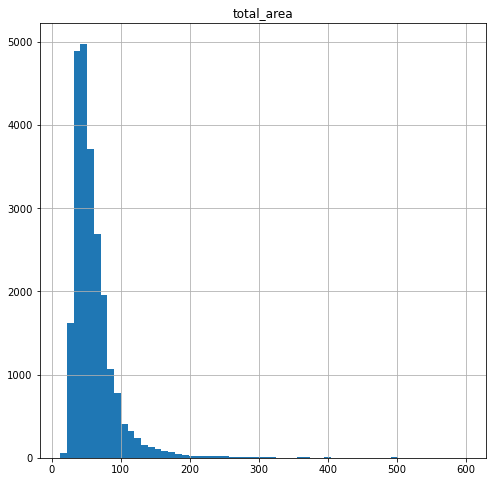

In [395]:
data.hist('total_area', bins=(60), figsize=(8,8), range = (12, 600))

на графике с укрупненным диапазоном можно видеть, что квартиры более 150 кв.м очень редкое явление на сервисе

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

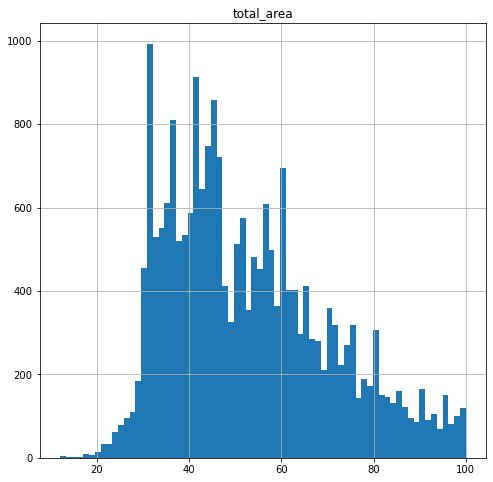

In [396]:
data.hist('total_area', bins=(70), figsize=(8,8), range = (12, 100))

по гистаграмме видно, что среди общей площади объектов в исследуемой таблице количество квартир увеличивается от площади в чуть более 30 кв. м до 43 кв. м, после 45 кв. м количество объявлений на сервисе снижается за исключением пика в районе метража в 60 кв. м. Доля объявленией с площадью квартир менее 30 меньше, чем квартир с площадью в 100 кв. м

*жилая площадь объектов*

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

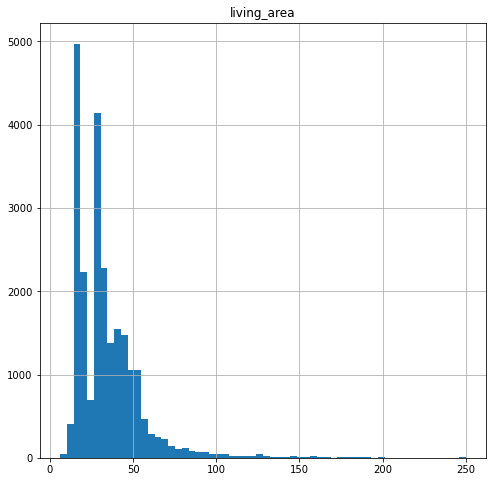

In [397]:
data.hist('living_area', bins=(60), figsize=(8,8), range = (6, 250))

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

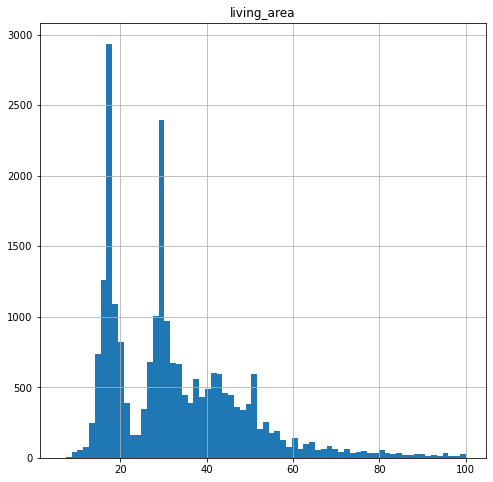

In [398]:
data.hist('living_area', bins=(70), figsize=(8,8), range = (6, 100))

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

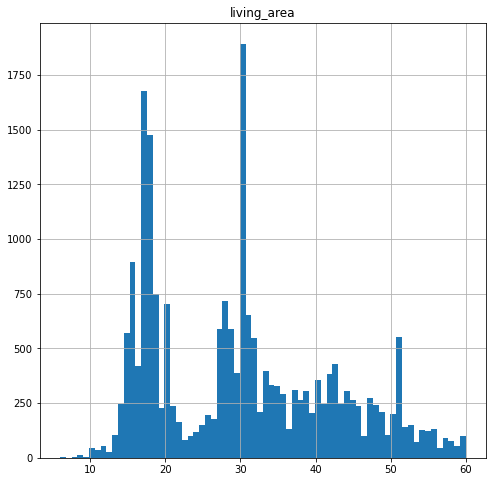

In [399]:
data.hist('living_area', bins=(70), figsize=(8,8), range = (6, 60))

на графике видно, что наиболее распространенной жилой площадью среди объявлений является площадь 17-18 кв.м, также пики в районе 28-30 кв. м (что бьется количеством пиков для диаграммы общей площади объекта). Более невостребованными являются жилые площади ниже 14 кв. м и более 70 кв. м

*площадь кухни*

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

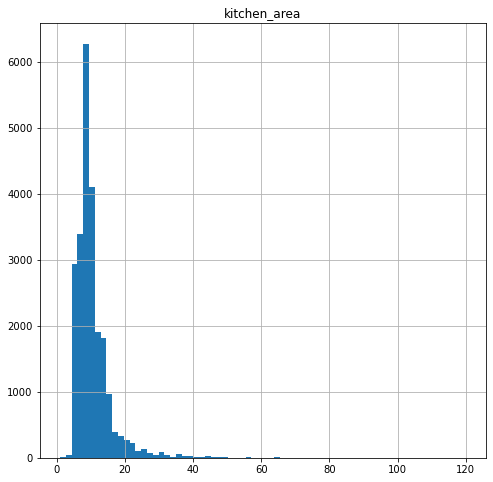

In [400]:
data.hist('kitchen_area', bins=(70), figsize=(8,8), range = (1, 120))

с маленьким масштабом видно, что количество кухонь с площадью более около 17 м2 очень мало и становится еще меньше

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

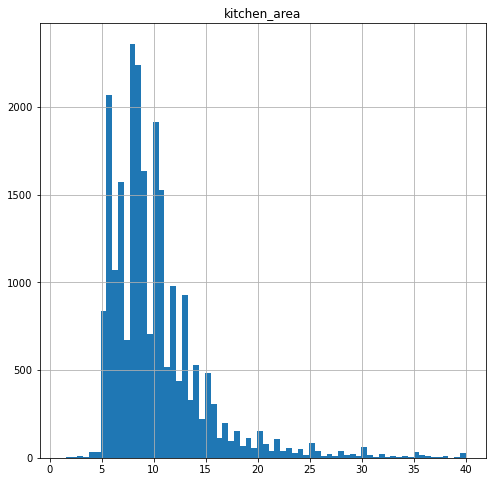

In [401]:
data.hist('kitchen_area', bins=(70), figsize=(8,8), range = (1, 40))

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

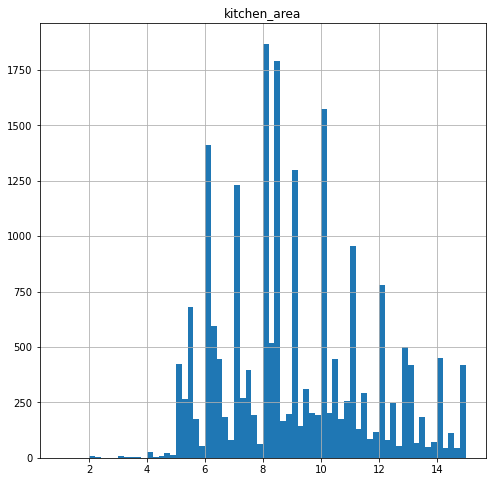

In [402]:
data.hist('kitchen_area', bins=(70), figsize=(8,8), range = (1, 15))

Согласно полученного графика понятно, что в большинстве своем кухни представлены метражом в 6-10 кв. м, после чего с увеличением площади кухни частота ее в представленных объектах падает

*цена объекта*

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

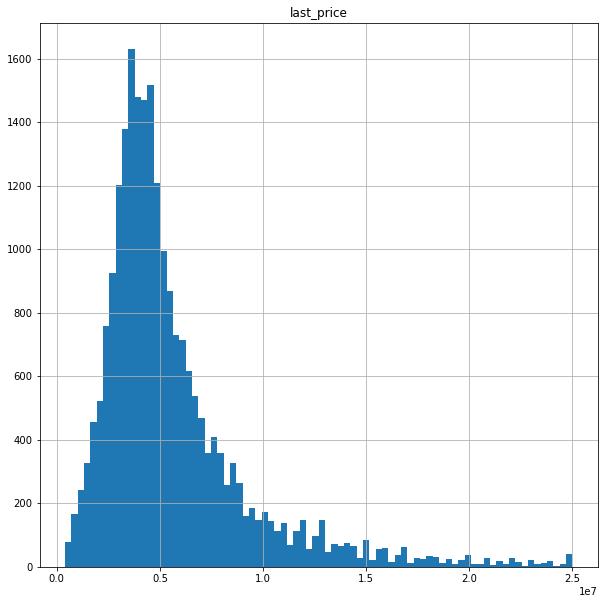

In [403]:
data.hist('last_price', bins=(80), figsize=(10,10), range = (400000, 25000000))

наиболее распространенной ценой является цена равная около 3,5 млн.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

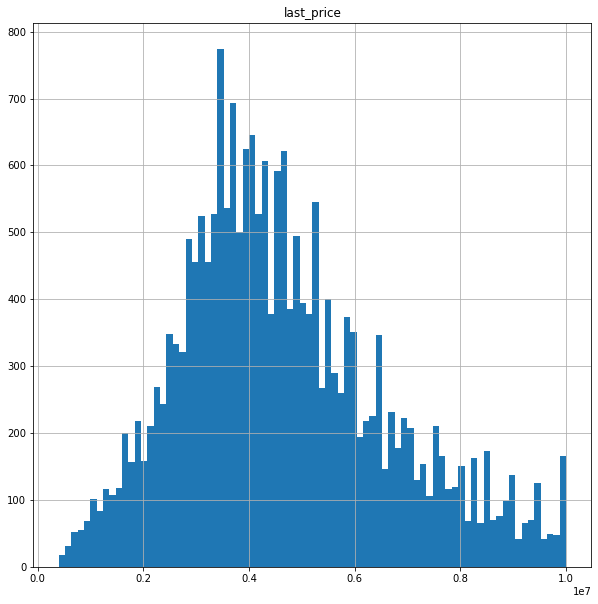

In [404]:
data.hist('last_price', bins=(80), figsize=(10,10), range = (400000, 10000000))

для цены в диапазоне от минимальной до 9 млн рублей график симметричен, и для данной части цен похож на нормальное распределение

*количество комнат*

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

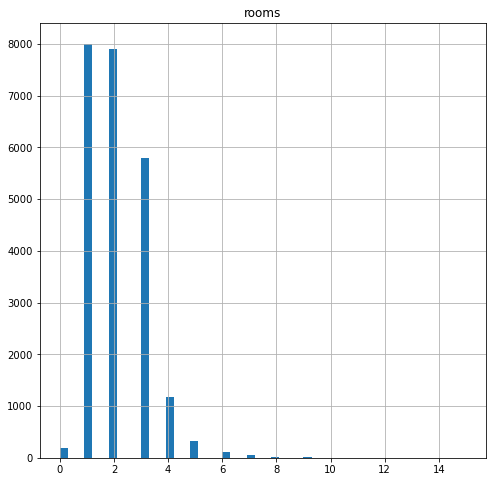

In [405]:
data.hist('rooms', bins=(50), figsize=(8,8), range = (0, 15))

наиболее распространенным вариантом предложения на сервисе являются 1-2х комнатные квартиры, немного уступают 3х комнатные. Количество на сервисе однокомнатных(студий/свободной планировки) невелико, меньше чем квартир с 5ю комнатами, от 6 комнат в квартире количество предложений очень мало

*высота потолков*

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

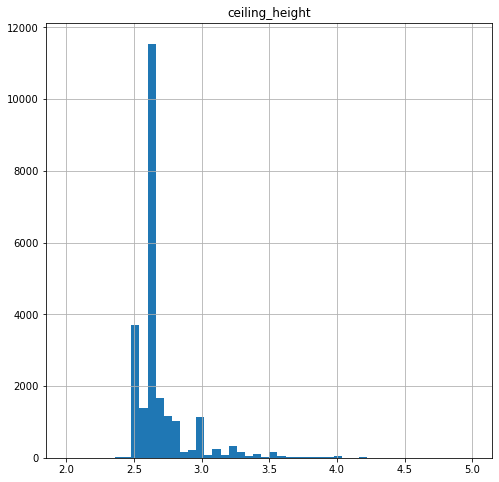

In [406]:
data.hist('ceiling_height', bins=(50), figsize=(8,8), range = (2, 5))

Очевидно, что самый распространенный вариант - высота 2,7 м, что подтверждает график. Также "частый" вариант среды объяевлений - 2,5 м (однако он реже примерно на 70 % относительно стандартной высоты). В общем, среди предложений на сервисе доступными вариантами являются объекты с высотой потолков 2.5-2.8 м, 3.0 м

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

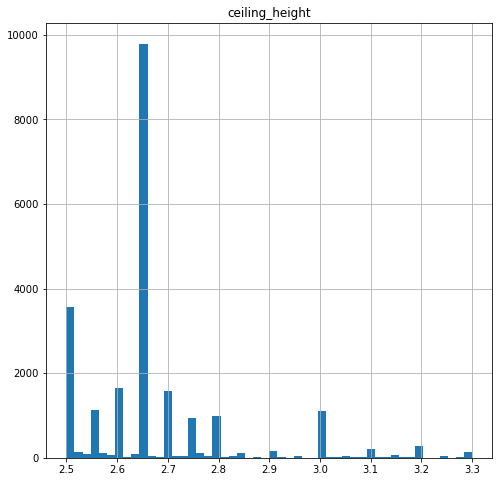

In [407]:
data.hist('ceiling_height', bins=(50), figsize=(8,8), range = (2.5, 3.3))

*этаж квартиры*

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

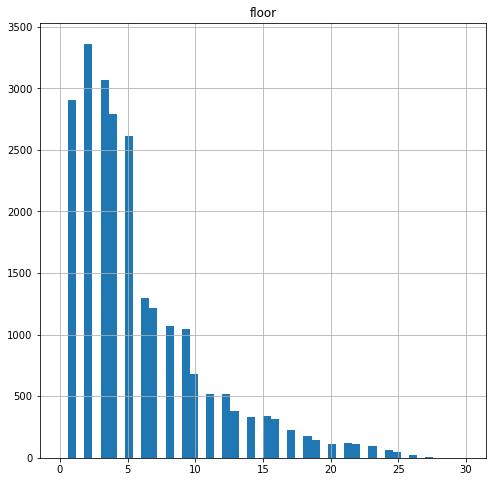

In [408]:
data.hist('floor', bins=(50), figsize=(8,8), range = (0, 30))

В целом, можно сказать, что самым доступным вариантом являются объекты, расположенные на этажах с 1го по 5й, следующим вариантом "по доступности" выделяются этажи с 6 по 10). При запросе покупателя объекта выше 10го этажа также возможно будет подобрать варианты, этажность объекта выше 25го этажа - редкость

тип этажа квартиры («первый», «последний», «другой»)

In [409]:
floor_grouped = data.pivot_table(index='type_floor', values='floor', aggfunc='count')

In [410]:
floor_grouped

,floor
type_floor,
другой,17343
первый,2907
последний,3329


array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

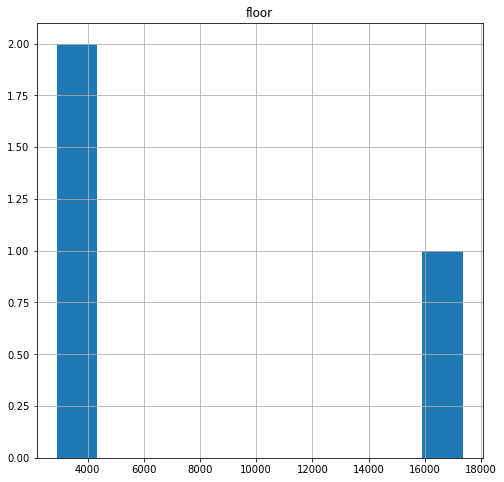

In [411]:
floor_grouped.hist('floor',figsize=(8,8))

<AxesSubplot:ylabel='floor'>

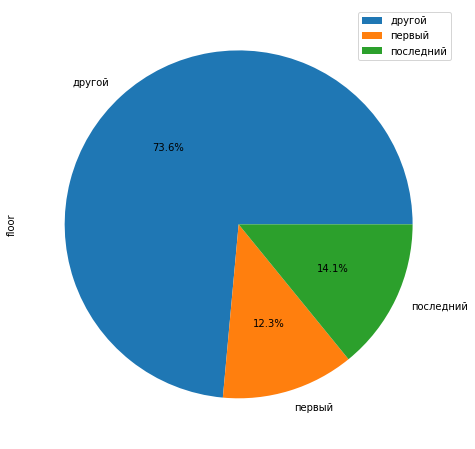

In [412]:
floor_grouped.plot(y='floor', kind='pie', figsize=(8,8), autopct='%1.1f%%')

из диаграммы видно, что большинство объектов не относится ни к первому, ни к последнему этажам, распределение следующее:
- первый и последний составляют 26,4 %, причем между собой они распределены почти одинаково;
- другие - 73,6 %

*общее количество этажей в доме*

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

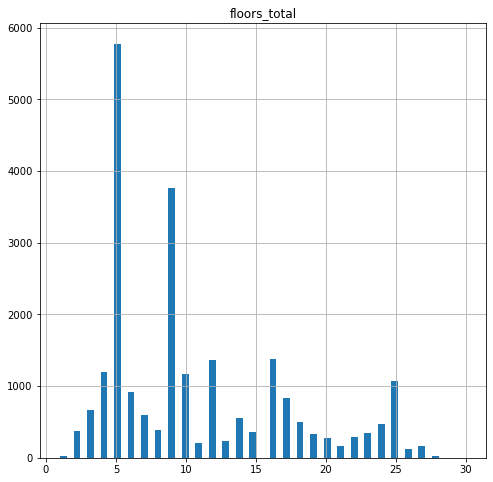

In [413]:
data.hist('floors_total', bins=(60), figsize=(8,8), range = (1, 30))

По графику видно, что преобладают:
1. пятиэтажжные здания;
2. девятиэтажные здания

Примерно одинаковое количество предложений для объектов высотой в 4, 10, 12, 16 этажей. Чуь меньше объектов 6ти- и 25-тиэтажных

*расстояние до центра города в метрах*

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

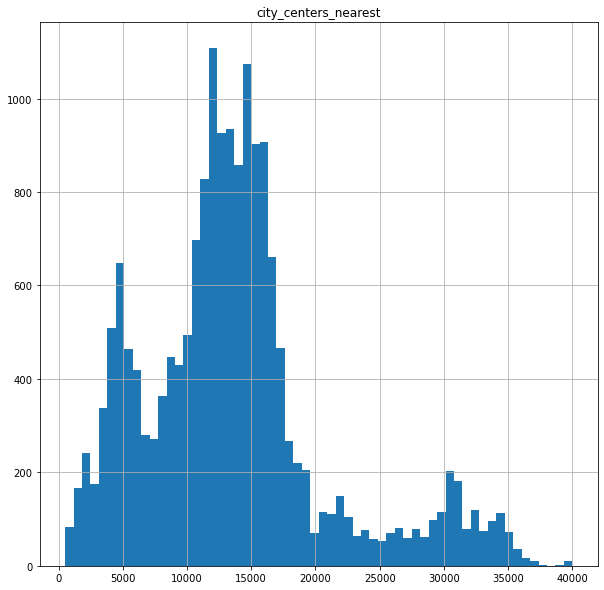

In [414]:
data.hist('city_centers_nearest', bins=(60), figsize=(10,10), range = (500, 40000))

БОльшая часть объектов расположена от центра на расстоянии от 12 до 17 км

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

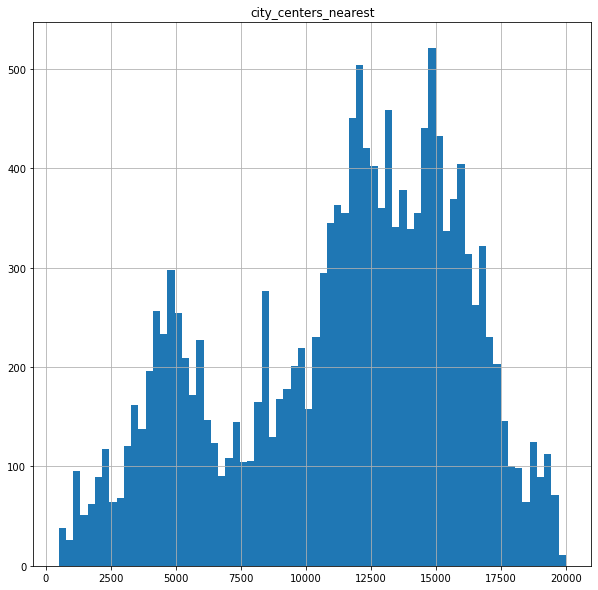

In [415]:
data.hist('city_centers_nearest', bins=(70), figsize=(10,10), range = (500, 20000))

график с увеличенным масштабом так же подтверждает удаленность в от центра 12-17 км для большинства объектов, также среди предложений сервиса есть достатосное количество объектом с удаленностью от центра 4-5 км. Из графика также видно что одинаковое количество предложений есть для расстояний примерно в 2,5 км и 19 км

*расстояние до ближайшего аэропорта*

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

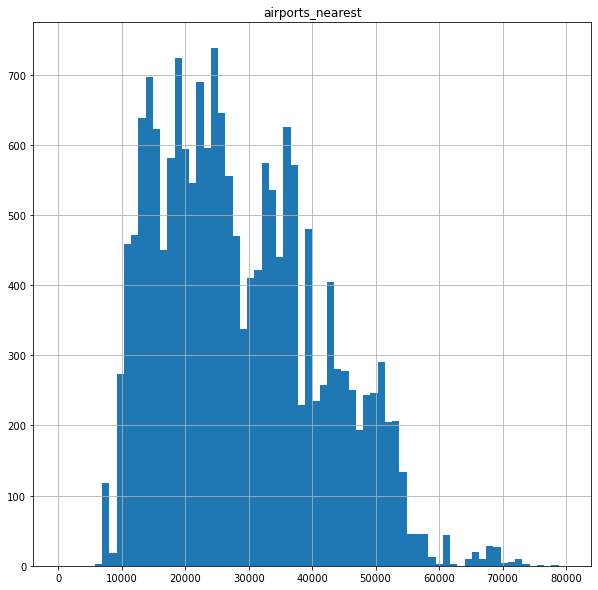

In [416]:
data.hist('airports_nearest', bins=(70), figsize=(10,10), range = (50, 80000))

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

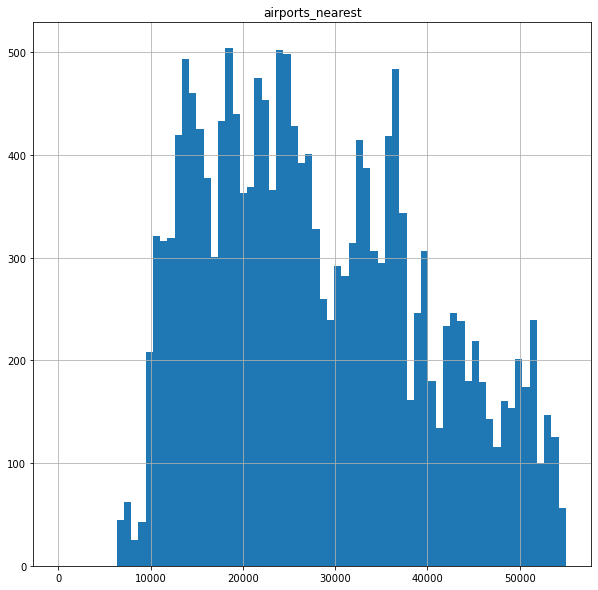

In [417]:
data.hist('airports_nearest', bins=(70), figsize=(10,10), range = (50, 55000))

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

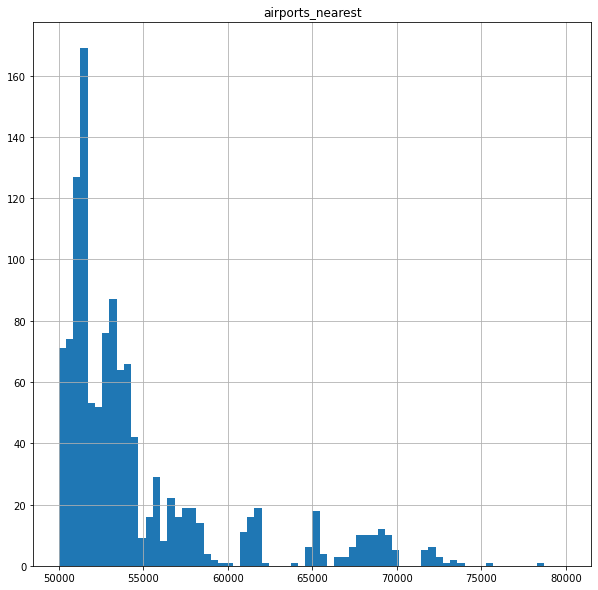

In [418]:
data.hist('airports_nearest', bins=(70), figsize=(10,10), range = (50000, 80000))

из известных в таблице данных большая часть объектов расположены от аэропорта на расстоянии от 15 до 20 км, а также на расстоянии примерно 32-37 км от аэропрта. на расстоянии выше 55 км объектов очень мало относительно общей массы объевлений, и в данном диапазоне разброс, объекты расположены неравномерно.

*расстояние до ближайшего парка*

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

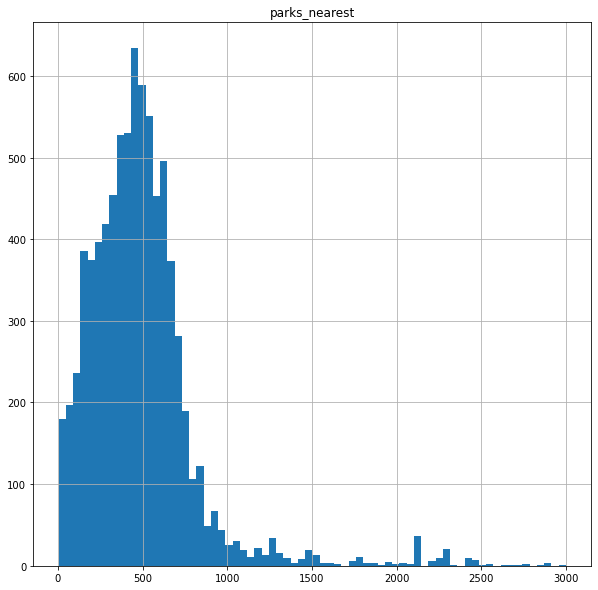

In [419]:
data.hist('parks_nearest', bins=(70), figsize=(10,10), range = (5, 3000))

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

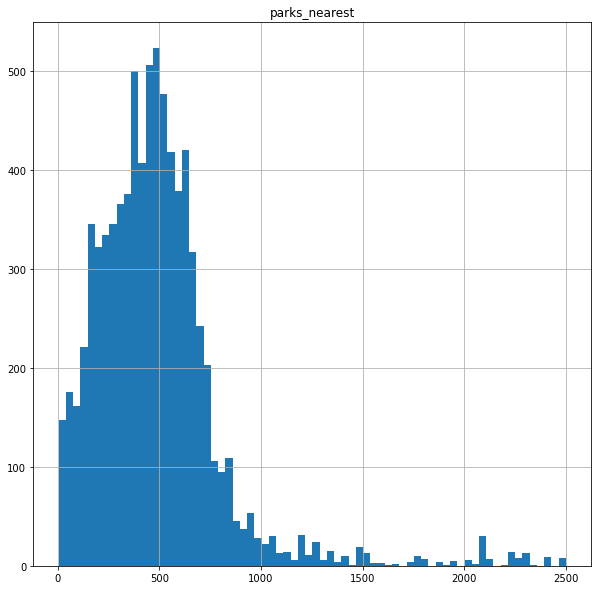

In [420]:
data.hist('parks_nearest', bins=(70), figsize=(10,10), range = (5, 2500))

при рассмотрении распределения объектов в зависимости от расстояния до ближайшего парка можно сказать что парки расположены в непосредственной близости - на расстоянии до 600-700 м, для расстояний более километра - количества объектов незначительное

*день и месяц публикации объявления*

array([[<AxesSubplot:title={'center':'day_publication'}>]], dtype=object)

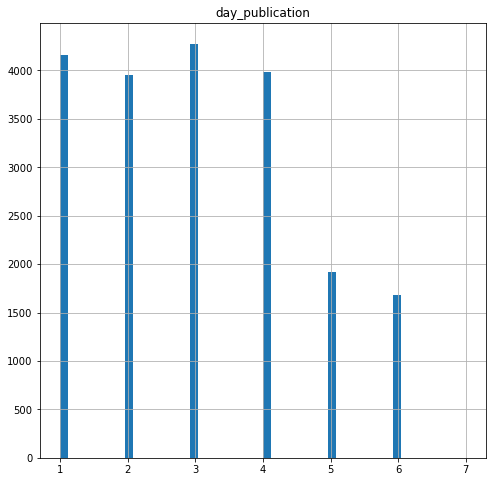

In [421]:
data.hist('day_publication', bins=(50), figsize=(8,8), range = (1, 7))

Наиболее частыми днями для публикации объяевлений являются дни с понедельника по четверг

array([[<AxesSubplot:title={'center':'month_publication'}>]], dtype=object)

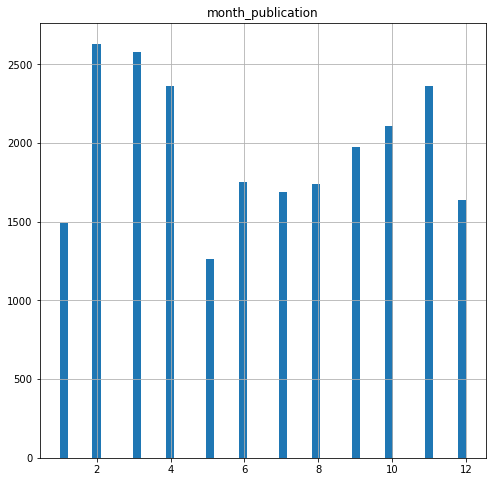

In [424]:
data.hist('month_publication', bins=(50), figsize=(8,8), range = (1, 12))

Пик опубликованных объявлений приходится на февраль-апрель, затем частота публикации немного падает до августа, после повышается до ноября включительно. самыми неактуальными месяцами с точки зрения публикации являются январь, мая и декабрь

In [425]:
data.loc[:, ['total_area', 
         'living_area', 
         'kitchen_area', 
         'last_price', 
         'rooms', 
         'ceiling_height', 
         'floor', 
         'floors_total', 
         'city_centers_nearest', 
         'airports_nearest', 
         'parks_nearest', 
         'day_publication', 
         'month_publication',
        'year_publication']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,day_publication,month_publication,year_publication
count,23579.000000,23539.000000,23399.000000,2.357900e+04,23579.000000,23579.000000,23579.000000,23579.000000,18086.000000,18063.000000,23579.000000,23579.000000,23579.000000,23579.000000
mean,60.352407,34.473572,10.480142,6.541701e+06,2.071504,2.698161,5.875610,10.673226,14186.709886,28788.207275,2228.651470,2.568175,6.400399,2017.367742
std,35.661189,21.788445,5.695274,1.090192e+07,1.078508,0.228896,4.871354,6.594746,8616.894746,12629.032636,1265.430512,1.788422,3.493124,1.039517
min,12.000000,6.000000,1.300000,4.300000e+05,0.000000,2.400000,1.000000,1.000000,181.000000,0.000000,1.000000,0.000000,1.000000,2014.000000
25%,40.000000,18.700000,7.300000,3.420000e+06,1.000000,2.600000,2.000000,5.000000,9234.000000,18574.000000,601.000000,1.000000,3.000000,2017.000000
50%,52.000000,30.000000,9.000000,4.650000e+06,2.000000,2.650000,4.000000,9.000000,13094.000000,26726.000000,3127.000000,3.000000,6.000000,2017.000000
75%,69.850000,42.400000,12.000000,6.800000e+06,3.000000,2.700000,8.000000,16.000000,16293.000000,37247.000000,3127.000000,4.000000,10.000000,2018.000000
max,900.000000,409.700000,112.000000,7.630000e+08,19.000000,8.000000,33.000000,60.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000,2019.000000


#### Исследование скорости продажи квартир

Построим гистограмму по имеющимся данным о времени объявления на сайте

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

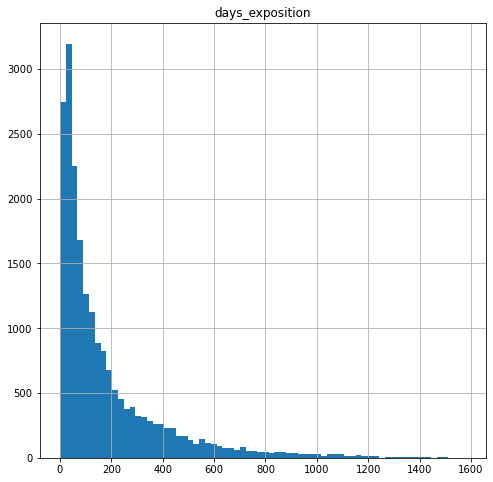

In [426]:
data.hist('days_exposition', bins=(70), figsize=(8,8), range = (0, 1580))

По гистограмме видно, что в данных есть объявления, значительно превышающие 1000 дней. Также график начинается с 0: как ранее выяснили, в таблице также присутствуют объявления со сроком снятия их с сайта 1, 2, 3 дня.

In [427]:
data['days_exposition'].describe()

count    20411.000000
mean       180.981040
std        219.795255
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

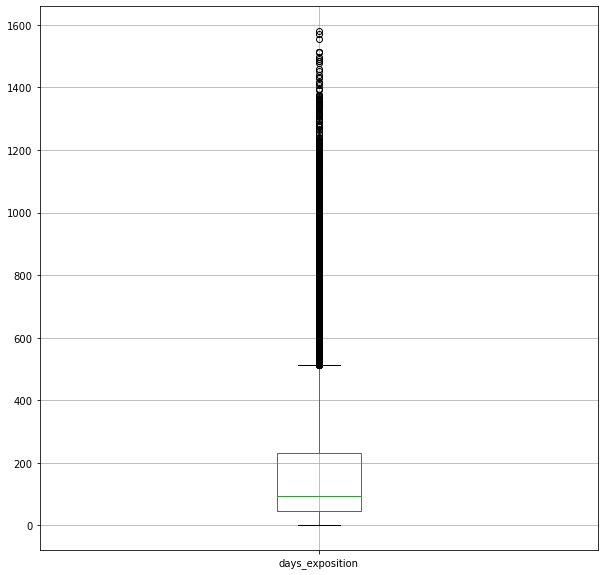

In [428]:
data.boxplot(column='days_exposition', grid=True, figsize=(10,10))

Среднее арифметическое и медиана отображены в ячейке выше и составляют 180.98 и 95.0 соответственно.\
Чаще всего продажи занимают 48 дней и 60 дней согласно гистограммы. согласно диаграммы размаха а также методу describe()
средние сроки продажи составляют от 45 до 232 дней. за границей выбросов количество дней на сайте более 500, считаем их непривычно долгими. За непривычно быстрые сроки снятия объявления примем значения менее Q1, т.е. менее 45 дней

In [429]:
print(232+(232-45)*1.5)

512.5


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

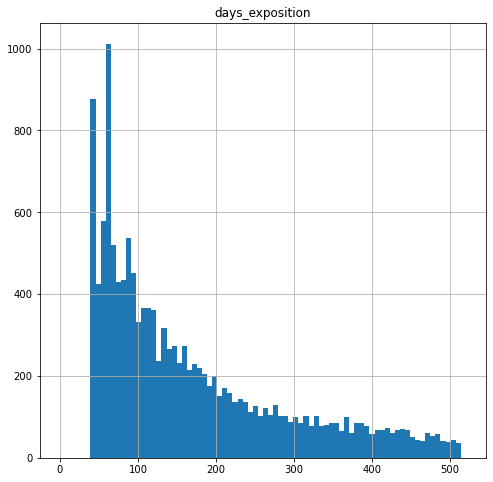

In [430]:
(data
.query('days_exposition <= 512.5 and days_exposition >= 45')
.hist('days_exposition', bins=(80), figsize=(8,8), range = (0, 520))
)

In [431]:
data.loc[data['days_exposition'] >= 512.5, 'days_exposition'].count()

1663

Количество объявлений, относящихся к выбросам достаточно велико. Кроме того, в таблице ранее также были оставлены пропуски, которых было более, чем 3000, в связи с чем необходимо понимать, что информация недостаточно полная. Однако, продажа квартиры, укладывающаяся в срок от месяца до 8 месяцев похожа на реалистичную

#### Изучение влияние на стоимость различных факторов

Посмотрим как влияют различные факторы на стоимость объекта

In [432]:
data['last_price'].describe()

count    2.357900e+04
mean     6.541701e+06
std      1.090192e+07
min      4.300000e+05
25%      3.420000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Здесь и далее при рассмотрении влияния факторов на стоимость предлагаем ограничиваться по стоимости третьим квартилем

*Рассмотрим зависимость: цена - общая площадь*

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

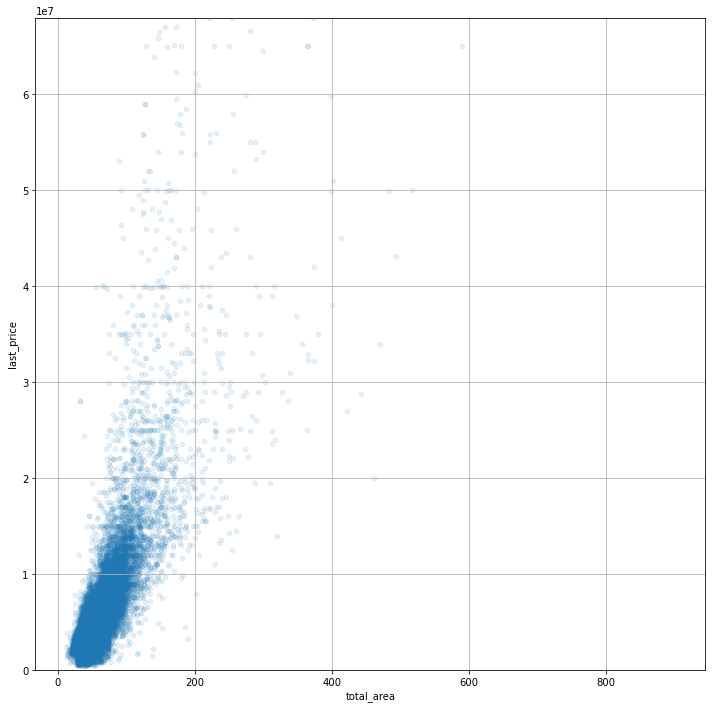

In [433]:
(data
    .plot(x='total_area', y='last_price', 
          ylim=(0, 68000000), grid=True, figsize=(12, 12), kind='scatter', alpha=0.1, legend=True)
)

По диаграмме рассеяния можно выделить две области:
- при площади до 100 кв. м цена увеличивается равномерно до стоимости примерно в 9 млн (наиболее плотная полоса одной толщины на диаграмме), в данном диапазоне цен есть одиночные объявления с площадью до 200 кв. м
- при цене более 9 млн неоднородность распределения в целом увеличивается, и точки на диаграмме идут в разнобой, что говорит о том, что зависимость начинает падать
Также на диаграмме видно, что при стоимости более 15000000 (до площади 200 кв. м) плотность точек заметно снижается, разброс увеличивается еще больше.
Таким образом, на стоимость площадь объекта равномерно влияет тогда, когда площадь не превышает 100 кв м

*Рассмотрим зависимость: цена - жилая площадь*

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

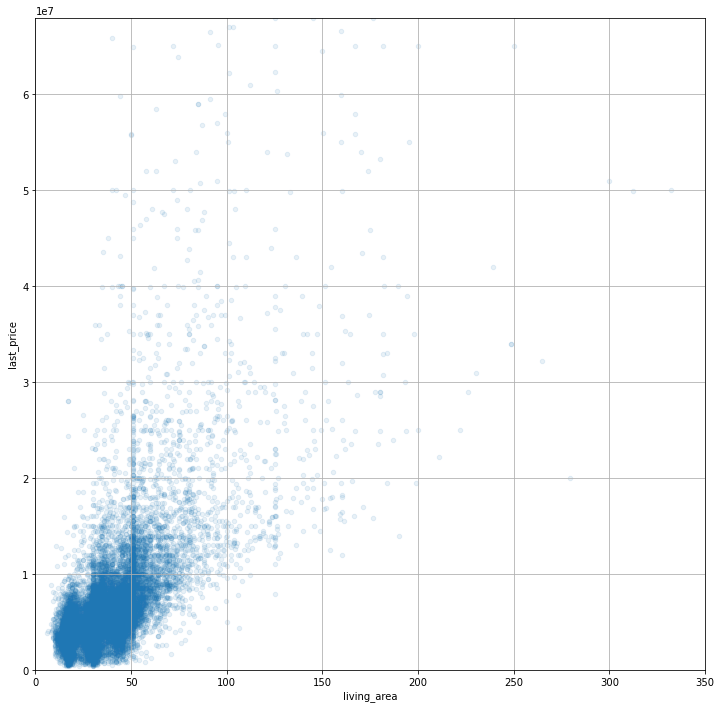

In [434]:
(data
    .plot(x='living_area', y='last_price', 
          ylim=(0, 68000000), xlim=(0, 350), grid=True, figsize=(12, 12), kind='scatter', alpha=0.1, legend=True)
)

По диаграмме видно, что максимальная зависимость наблюдается при жилой площади около 55 м2, причем в данной области с максимальной плотностью можно выделить три отдельные части, для которых одинаковая тенденция к увеличению стоимости до 9 млн для первой, до 10 млн для последних двух.\
Далее увеличивается разброс точек (в целом тенденция сохраняется для квадрата, ограниченного 200 кв.м и ценой 40 млн, за границами данного квадрата зависимость выявить сложно

*Рассмотрим зависимость: цена - площадь кухни*

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

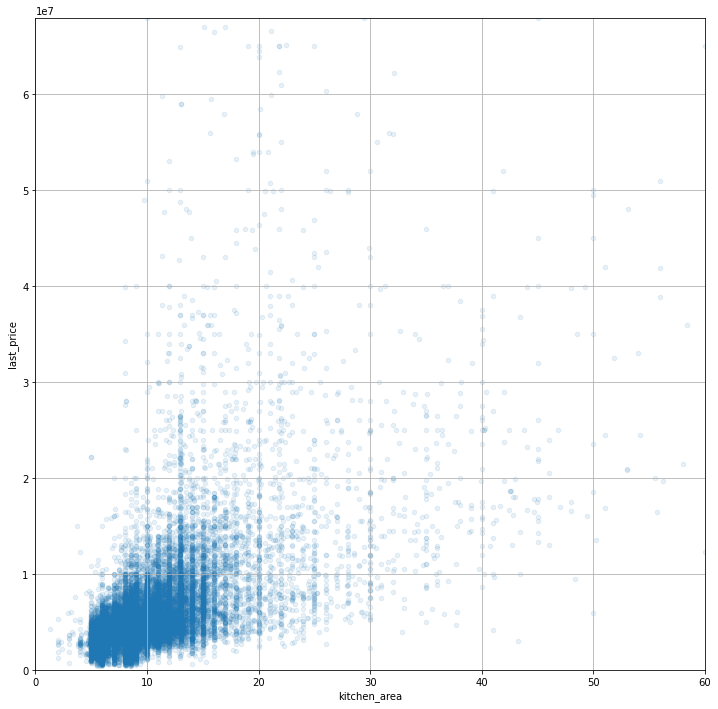

In [435]:
(data
    .plot(x='kitchen_area', y='last_price', 
          ylim=(0, 68000000), xlim=(0, 60), grid=True, figsize=(12, 12), kind='scatter', alpha=0.1, legend=True)
)

из диаграммы видно, что при увеличении площади кухни стоимость увеличивается (аналогично с зависимостью по общей и жилой площадям объекта), также можно выделить аналогичные области стоимостью до 10 млн, четкая зависимость видно при площади кухни в 12-15 кв. м.\
также внутри общих пятен по плотности видны прямые зависимости для каждого метража кухни в зависимости от их частоты в общем количестве объявлений (вертикальные полосы), что говорит о том, что для отдельно взятой площади кухни цена также увеличивается 

*Рассмотрим зависимость: цена - количество комнат*

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

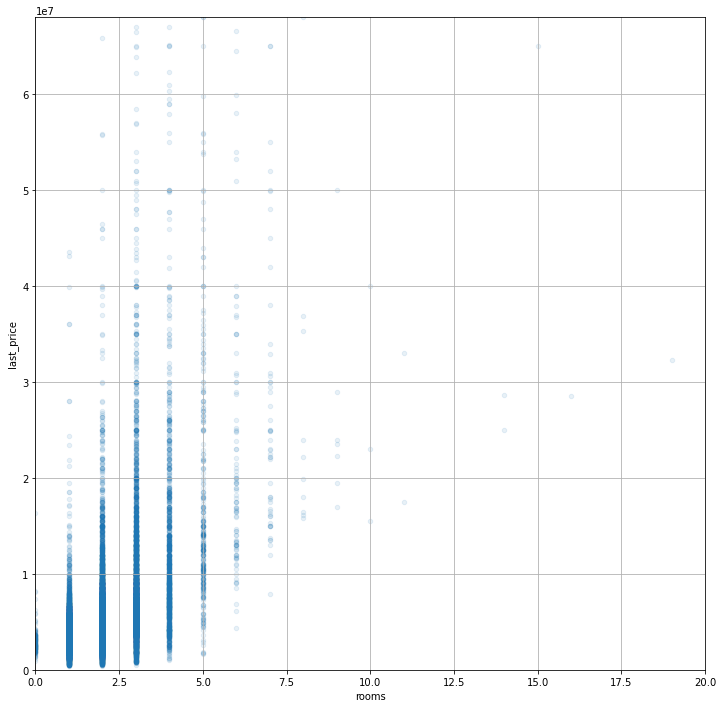

In [436]:
(data
    .plot(x='rooms', y='last_price', 
          ylim=(0, 68000000), xlim=(0, 20), grid=True, figsize=(12, 12), kind='scatter', alpha=0.1, legend=True)
)

по диаграмме видно, что в исходной таблице укрупненно квартиры чаще встречаются с количеством комнат до 7, при этом больше всего квартир с комнатами до 4х, что видно из интенсивности линий. В целом, диаграмма подтверждает, что с увеличение количества комнат увеличивается стоимость, что видно из различный "длин" для каждого количества комнат, больше всего предложений о продаже 3хкомнатных квартир

*Рассмотрим зависимость: цена - тип этажа*

<AxesSubplot:xlabel='type_floor', ylabel='last_price'>

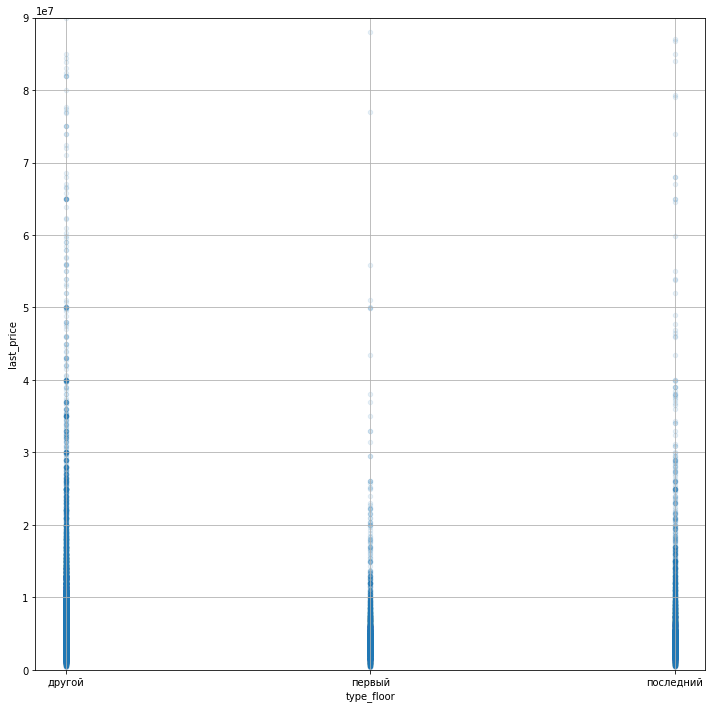

In [437]:
(data
    .plot(x='type_floor', y='last_price', 
          ylim=(0, 90000000), grid=True, figsize=(12, 12), kind='scatter', alpha=0.1, legend=True)
)

Диаграмма показывает, что квартиры на первом этаже можно купить дешевле, чем остальные (чаще всего по стоимости до 1,5 млн). На последнем этажи квартиры также окажутся дешевле, чем на дугих этажах, очевидно выраженная плотность заканчивается в районе 3-4 млн. Квартиры, которые не подаются на "других" этажах имеют больший диапазон по стоимости и количества данных предложений в общей массе объявлений

*Рассмотрим зависимость: цена - даты размещения*

<AxesSubplot:xlabel='day_publication', ylabel='last_price'>

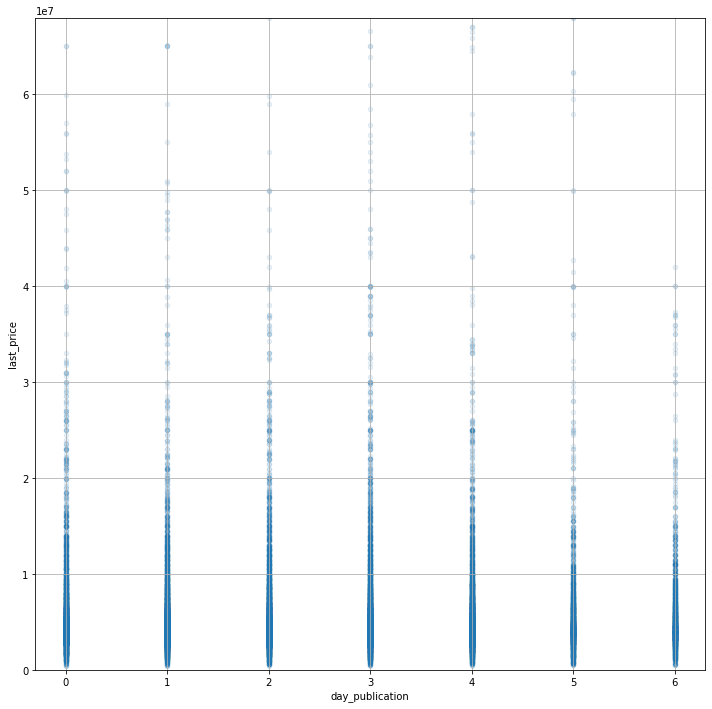

In [438]:
(data
    .plot(x='day_publication', y='last_price', 
          ylim=(0, 68000000), grid=True, figsize=(12, 12), kind='scatter', alpha=0.1, legend=True)
)

по диаграмме видно, что цена в зависимости от дня недели публикации предложения не зависит, за маленьким исключением субботы и воскресенья для которых ранее остальных падает плотность, если рассматривать области со стоимостью до 3 млн. Для объектов дороже 3 млн: в среду объявления о продаже квартиры публикуют незначительно чаще

<AxesSubplot:xlabel='month_publication', ylabel='last_price'>

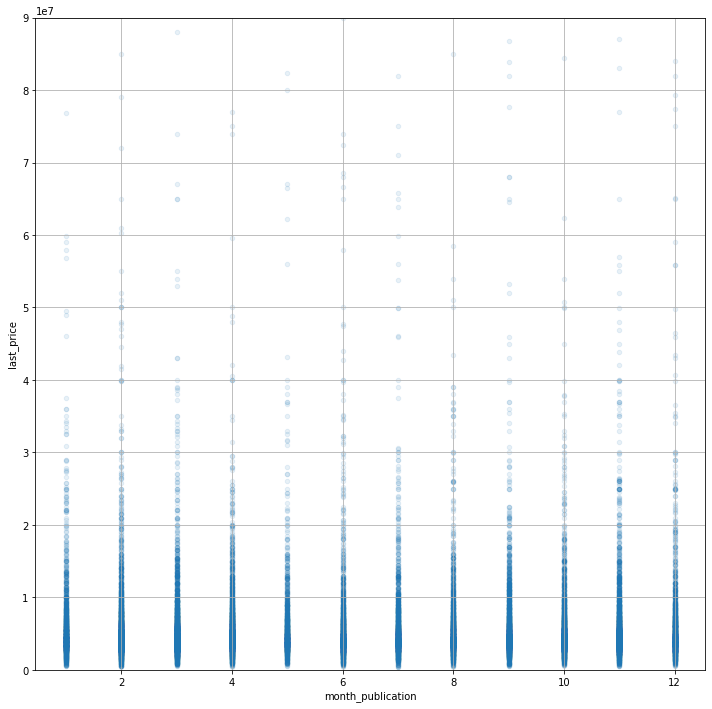

In [439]:
(data
    .plot(x='month_publication', y='last_price', 
          ylim=(0, 90000000), grid=True, figsize=(12, 12), kind='scatter', alpha=0.1, legend=True)
)

в целом, для месяцев ситуация аналогична, при стоимости квартир до 3 млн зависимости для каждого месяца похожи друг на друга, выше 3х миллионов для каждого месяца увеличивается разброс, и зависимость неустойчива

<AxesSubplot:xlabel='year_publication', ylabel='last_price'>

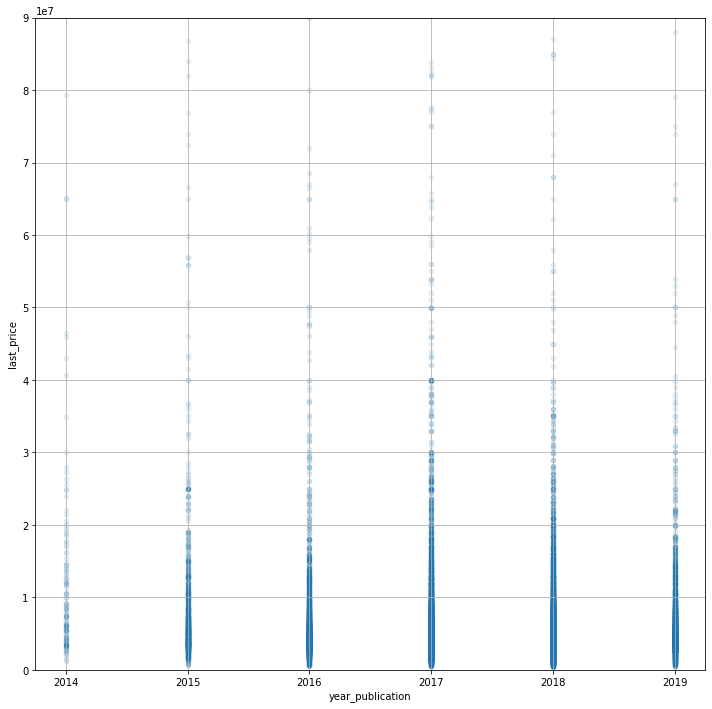

In [440]:
(data
    .plot(x='year_publication', y='last_price', 
          ylim=(0, 90000000), grid=True, figsize=(12, 12), kind='scatter', alpha=0.1, legend=True)
)

по диаграмме видно, что с 2014 года по 2018 увеличивается стоимость объектов при продаже, также можно сказать, что 2017 год был немного "успешнее" 2018, тк дл него плотность для объектов свыше 4х млн сохраняется немного дольше. 2019 год в целом похож на 2016, что возможно, не ожидалось.

In [441]:
data_to_research = data.loc[:, ['last_price', 
                                'total_area', 
                                'living_area', 
                                'kitchen_area', 
                                'rooms', 
                                'type_floor', 
                                'day_publication',
                               'month_publication',
                               'year_publication']]

In [442]:
data_to_research.head()

,last_price,total_area,living_area,kitchen_area,rooms,type_floor,day_publication,month_publication,year_publication
0,13000000,108.0,51.0,25.00,3,другой,3,3,2019
1,3350000,40.4,18.6,11.00,1,первый,1,12,2018
2,5196000,56.0,34.3,8.30,2,другой,3,8,2015
3,64900000,159.0,51.0,12.95,3,другой,4,7,2015
4,10000000,100.0,32.0,41.00,2,другой,1,6,2018


Рассмотрим коэффициенты корреляции для каждого фактора

In [443]:
data_to_research.corr()

,last_price,total_area,living_area,kitchen_area,rooms,day_publication,month_publication,year_publication
last_price,1.000000,0.653657,0.563374,0.459564,0.363280,0.001526,0.002503,-0.042543
total_area,0.653657,1.000000,0.915262,0.602134,0.758389,-0.005488,0.005036,-0.079512
living_area,0.563374,0.915262,1.000000,0.440486,0.833725,-0.007568,0.002195,-0.073380
kitchen_area,0.459564,0.602134,0.440486,1.000000,0.283303,-0.010214,0.004146,-0.056436
rooms,0.363280,0.758389,0.833725,0.283303,1.000000,-0.004990,-0.003716,-0.055422
day_publication,0.001526,-0.005488,-0.007568,-0.010214,-0.004990,1.000000,0.012213,-0.003961
month_publication,0.002503,0.005036,0.002195,0.004146,-0.003716,0.012213,1.000000,-0.269867
year_publication,-0.042543,-0.079512,-0.073380,-0.056436,-0.055422,-0.003961,-0.269867,1.000000


На основании коэффициентов становится понятно, что наибольшее влияние на стоимость оказывает общая площадь объекта. Влияние на цену различных факторов в порядке их убывания можно расположить следующим образом:
- общая площадь (коэффициенты для жилой площади и кухни далее не сильно отличаются от данного, так эти три фактора коррелируются между собой);
- жилая площадь;
- площадь кухни;
- количество комнат;
- год публикации (коэффициент близок к 0 и он отрицательный, на графике видно, что с увеличением года к 2019 стоимость снизилась);
- месяц публикации (можно сказать, что зависимость не наблюдается);
- день публикации (можно сказать, что зависимость не наблюдается)

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Сведем в таблице информацию о количестве объявлений и медианной стоимости одного квадратного метра для каждого населенного пункта. 

In [444]:
popular_locality = data.pivot_table(index=['locality_name'], values='price_one_m2', aggfunc=['count', 'median'])

In [445]:
popular_locality.columns = ['number_exposition', 'median_price']

In [446]:
popular_locality = popular_locality.sort_values(by='number_exposition', ascending=False).reset_index()

Оставим 10 населенных пунктов с наибольшим количество объявлений

In [447]:
popular_locality = popular_locality.loc[:9]
popular_locality = popular_locality.sort_values(by='median_price', ascending=False)

In [448]:
popular_locality

,locality_name,number_exposition,median_price
0,Санкт-Петербург,15682,104739.166541
5,Пушкин,369,100000.000000
2,Кудрово,469,95588.235294
7,поселок Парголово,327,91642.857143
1,Мурино,585,86231.884058
3,поселок Шушары,439,76829.268293
6,Колпино,338,74723.748474
8,Гатчина,307,67796.610169
4,Всеволожск,397,65789.473684
9,Выборг,235,58307.692308


Самая высокая стоимость одного квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.

#### Средняя цена каждого километра. Влияние расстояния до центра города на стоимость объектов 

In [449]:
price_km_to_center = (data
                      .query('locality_name == "Санкт-Петербург"')
                      .pivot_table(index=['locality_name'], values=['last_price', 'to_center_km'], aggfunc='mean')
                     )

In [450]:
price_km_to_center['mean_price_km'] = price_km_to_center['last_price'] / price_km_to_center['to_center_km']
price_km_to_center

,last_price,to_center_km,mean_price_km
locality_name,,,
Санкт-Петербург,8.059627e+06,11.586261,695619.285824


Средняя стоимость километра до центра в Cанкт-Петербурге составляет 695.62 тыс.

Посмотрим на зависимость стоимости от удаленности от центра

<AxesSubplot:xlabel='to_center_km', ylabel='last_price'>

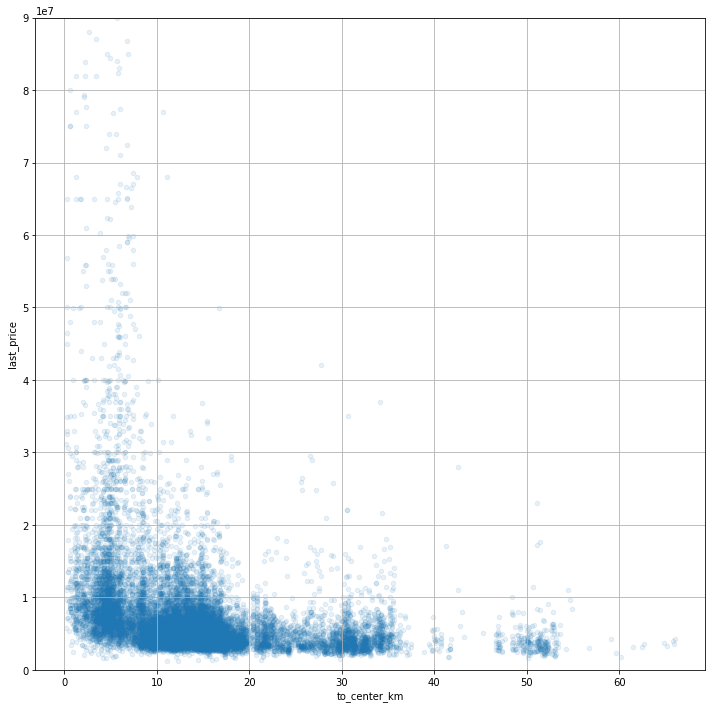

In [451]:
(data
    .plot(x='to_center_km', y='last_price', 
          ylim=(0, 90000000), grid=True, figsize=(12, 12), kind='scatter', alpha=0.1, legend=True)
)

На диаграмме видно, что с увеличением расстояния от центра падает стоимость квартир. Также на графике видно, что больше всего предложений стоимостью до 1 млн, находящихся от центра на расстоянии примерно от 4 до 20 км. можно выделить вторую область ограниченную цено 1-2 млн и расстоянием также до 20, внутри которой предложений меньше, но также прослеживается зависимость на уменьшении цены с увеличением удаленности. Для расстояний выше 20 количество предложений свыше 1 млн практически отсутствует. На расстоянии 50 км от центра на графике наблюдается еще одна область стоимостью до 1 млн.рублей, предполагаем, что это наиболее распространенные и населенные пункты под Санкт-Петербургом.

In [452]:
data.loc[(data['to_center_km'] < 53) & (data['to_center_km'] > 47), 'locality_name'].value_counts()

Ломоносов      115
Кронштадт       74
Петергоф        24
Зеленогорск      8
Name: locality_name, dtype: int64

Предположение подтвердилось

### Общий вывод

Задачей проекта было провести предобработку данных, изучить параметры объектов по отдельности, а также их влияние на общую стоимость.\
В результате предобработки были исключены пропуски, для которых возможно найти логическую замену (такие как наименование населенного пункта, относится ли объект к апартаментам, расстояние до парка и водоема, высота потолков). Также для пропусков по ходу рассмотрения были даны комментарии о возможных причинах их появления. В таблице были оставлены без изменений некоторые пропуски, такие как общая этажность объекта, количество дней размещения объявления ввиду того, что замена пропусков могла привести к искажению данных.
Также были откорректированы типы данных и исключены неявные дубликаты в наименовании населенных пунктов.

Таблица была рассмотрена на наличие аномальных значений, к которым отнесены высота потолков, жилая площадь менее 5.4 кв. м, стоимость объекта около 12 тысяч.

В ходе исследовательского анализа были рассмотрены гистограммы для следующих параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.\
По гистограммам даны комментарии о распределении значений для каждого параметра.

Также в ходе выполнения проекта были даны ответы на следующие вопросы:
1. Как быстро продавались квартиры?
2. Какой фактор больше всего влияет на стоимость (общая площадь, жилая площадь, площадь кухни, количество комнат, этаж, на котором расположена квартира, дата размещения)?

Результаты представлены ниже:
1. Средние сроки для проведения продажи составляют от 45 до 232 дней, непривычно долгие - свыше 500 дней, быстрые сроки снятия объявления составляют менее 45 дней.
2. Влияние на цену больше всего оказывают общая площадь, жилая площадь, площадь кухни; количество комнат также влияет на стоимость, но в меньшей мере; дата размещения объявления не оказывает влияния на стоимость, либо ее необходимо рассматривать в совокупности с иными факторами, в ходе работы влияние не обнаружено.

В проекте таже были поставлены задачи по:
- определению населённых пунктов с самой высокой и низкой стоимостью квадратного метра среди 10 самых распространенных;
- вычислению средней цены для каждого километра до центра среды объявлений для Санкт Петербурга.

Ответы:
- Самая высокая стоимость одного квадратного метра в Санкт-пеербурге, самая низкая - в Выборге.
- Средняя стоимость километра до центра в Cанкт-Петербурге составляет 695.62 тыс.